In [1]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as sk
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [2]:
#raw_data = pd.read_csv("alpha_export_residential.csv")
raw_data = pd.read_csv("alpha_export_commercial.csv")
features = raw_data.copy()
labels = features.pop("complexity")
features.pop("rfi_count")
features.head()

,kw_dwelling,kw_fire,kw_burner,kw_office,kw_commercial,kw_factory,kw_alteration,kw_pool,kw_garage,kw_addition,...,kw_workshop,kw_retail,application_type,spdocs,sddocs,pldocs,NumberLevels,ClassifiedUse,BuildingUse,RestrictedWork
0,1,1,0,1,1,0,0,1,0,0,...,0,0,4,0,0,1,0,11,0,0
1,1,1,0,1,1,0,0,1,0,0,...,0,0,2,0,0,3,0,11,0,0
2,1,1,0,1,1,0,0,1,0,0,...,0,0,3,2,0,1,0,11,0,0
3,1,1,0,1,1,0,0,1,0,0,...,0,0,2,1,0,1,0,14,7,0
4,1,1,0,1,1,0,0,1,0,0,...,0,0,2,1,0,1,0,14,7,0


In [3]:
# split the dataset into training and test sets
x_train, x_test, y_train, y_test = sk.train_test_split(features, labels, test_size=0.2, random_state = 42)

In [4]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [5]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # Use a sequential model.
  model = tf.keras.models.Sequential()

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=27, activation='relu'))
  
  model.add(tf.keras.layers.Dense(units=27, activation='relu'))
  
  model.add(tf.keras.layers.Dense(units=13, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 3 because
  # the model must choose among 3 possible output values (representing
  # R1, R2, R3 inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=3, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

Epoch 1/500
3/3 [==============================] - 0s 45ms/step - loss: 1.1396 - accuracy: 0.2920 - val_loss: 1.0465 - val_accuracy: 0.5018
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 1.0457 - accuracy: 0.4712 - val_loss: 1.0043 - val_accuracy: 0.5429
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 1.0134 - accuracy: 0.5357 - val_loss: 0.9804 - val_accuracy: 0.5777
Epoch 4/500
3/3 [==============================] - 0s 11ms/step - loss: 0.9928 - accuracy: 0.5858 - val_loss: 0.9591 - val_accuracy: 0.6194
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 0.9658 - accuracy: 0.6158 - val_loss: 0.9313 - val_accuracy: 0.6330
Epoch 6/500
3/3 [==============================] - 0s 11ms/step - loss: 0.9342 - accuracy: 0.6293 - val_loss: 0.9026 - val_accuracy: 0.6399
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 0.9089 - accuracy: 0.6311 - val_loss: 0.8729 - val_accuracy: 0.6474
Epoch 8/500
3/3 [====

3/3 [==============================] - 0s 8ms/step - loss: 0.3726 - accuracy: 0.7991 - val_loss: 0.3485 - val_accuracy: 0.8049
Epoch 60/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3742 - accuracy: 0.8019 - val_loss: 0.3489 - val_accuracy: 0.8112
Epoch 61/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3703 - accuracy: 0.8018 - val_loss: 0.3466 - val_accuracy: 0.8040
Epoch 62/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3684 - accuracy: 0.8032 - val_loss: 0.3473 - val_accuracy: 0.8067
Epoch 63/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3708 - accuracy: 0.8035 - val_loss: 0.3449 - val_accuracy: 0.8109
Epoch 64/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3682 - accuracy: 0.8046 - val_loss: 0.3446 - val_accuracy: 0.8067
Epoch 65/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3651 - accuracy: 0.8092 - val_loss: 0.3434 - val_accuracy: 0.8076
Epoch 66/500
3/3 [===============

3/3 [==============================] - 0s 8ms/step - loss: 0.3399 - accuracy: 0.8221 - val_loss: 0.3260 - val_accuracy: 0.8244
Epoch 118/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3390 - accuracy: 0.8253 - val_loss: 0.3257 - val_accuracy: 0.8277
Epoch 119/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3392 - accuracy: 0.8209 - val_loss: 0.3248 - val_accuracy: 0.8244
Epoch 120/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3396 - accuracy: 0.8189 - val_loss: 0.3228 - val_accuracy: 0.8247
Epoch 121/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3362 - accuracy: 0.8248 - val_loss: 0.3226 - val_accuracy: 0.8292
Epoch 122/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3406 - accuracy: 0.8257 - val_loss: 0.3225 - val_accuracy: 0.8367
Epoch 123/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3391 - accuracy: 0.8254 - val_loss: 0.3205 - val_accuracy: 0.8316
Epoch 124/500
3/3 [========

Epoch 175/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3246 - accuracy: 0.8328 - val_loss: 0.3086 - val_accuracy: 0.8361
Epoch 176/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3219 - accuracy: 0.8329 - val_loss: 0.3096 - val_accuracy: 0.8328
Epoch 177/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3219 - accuracy: 0.8311 - val_loss: 0.3093 - val_accuracy: 0.8322
Epoch 178/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3205 - accuracy: 0.8323 - val_loss: 0.3085 - val_accuracy: 0.8355
Epoch 179/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3204 - accuracy: 0.8315 - val_loss: 0.3091 - val_accuracy: 0.8385
Epoch 180/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3203 - accuracy: 0.8354 - val_loss: 0.3084 - val_accuracy: 0.8391
Epoch 181/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3220 - accuracy: 0.8334 - val_loss: 0.3095 - val_accuracy: 0.8376
Epoch 

Epoch 233/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3083 - accuracy: 0.8391 - val_loss: 0.3012 - val_accuracy: 0.8400
Epoch 234/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3074 - accuracy: 0.8380 - val_loss: 0.2988 - val_accuracy: 0.8388
Epoch 235/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3091 - accuracy: 0.8374 - val_loss: 0.3019 - val_accuracy: 0.8385
Epoch 236/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3085 - accuracy: 0.8383 - val_loss: 0.3010 - val_accuracy: 0.8379
Epoch 237/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3066 - accuracy: 0.8381 - val_loss: 0.3019 - val_accuracy: 0.8376
Epoch 238/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3093 - accuracy: 0.8341 - val_loss: 0.3002 - val_accuracy: 0.8376
Epoch 239/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3070 - accuracy: 0.8386 - val_loss: 0.3005 - val_accuracy: 0.8385
Epoch 

Epoch 291/500
3/3 [==============================] - 0s 13ms/step - loss: 0.3012 - accuracy: 0.8429 - val_loss: 0.2927 - val_accuracy: 0.8379
Epoch 292/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3006 - accuracy: 0.8437 - val_loss: 0.2945 - val_accuracy: 0.8409
Epoch 293/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3022 - accuracy: 0.8385 - val_loss: 0.2933 - val_accuracy: 0.8385
Epoch 294/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3023 - accuracy: 0.8421 - val_loss: 0.2967 - val_accuracy: 0.8415
Epoch 295/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3042 - accuracy: 0.8417 - val_loss: 0.3023 - val_accuracy: 0.8286
Epoch 296/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3054 - accuracy: 0.8372 - val_loss: 0.2950 - val_accuracy: 0.8391
Epoch 297/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3014 - accuracy: 0.8411 - val_loss: 0.2972 - val_accuracy: 0.8412
Epoch 

Epoch 349/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2969 - accuracy: 0.8452 - val_loss: 0.2926 - val_accuracy: 0.8403
Epoch 350/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2995 - accuracy: 0.8444 - val_loss: 0.2951 - val_accuracy: 0.8370
Epoch 351/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2998 - accuracy: 0.8405 - val_loss: 0.2927 - val_accuracy: 0.8400
Epoch 352/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2987 - accuracy: 0.8408 - val_loss: 0.2950 - val_accuracy: 0.8418
Epoch 353/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2998 - accuracy: 0.8405 - val_loss: 0.2973 - val_accuracy: 0.8304
Epoch 354/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3002 - accuracy: 0.8402 - val_loss: 0.2940 - val_accuracy: 0.8361
Epoch 355/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2985 - accuracy: 0.8395 - val_loss: 0.2897 - val_accuracy: 0.8481
Epoch 

Epoch 407/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2944 - accuracy: 0.8452 - val_loss: 0.2899 - val_accuracy: 0.8418
Epoch 408/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2954 - accuracy: 0.8438 - val_loss: 0.2889 - val_accuracy: 0.8403
Epoch 409/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2943 - accuracy: 0.8447 - val_loss: 0.2887 - val_accuracy: 0.8430
Epoch 410/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2914 - accuracy: 0.8448 - val_loss: 0.2901 - val_accuracy: 0.8403
Epoch 411/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2934 - accuracy: 0.8456 - val_loss: 0.2898 - val_accuracy: 0.8409
Epoch 412/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2916 - accuracy: 0.8480 - val_loss: 0.2901 - val_accuracy: 0.8406
Epoch 413/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2945 - accuracy: 0.8431 - val_loss: 0.2898 - val_accuracy: 0.8445
Epoch 

Epoch 465/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2911 - accuracy: 0.8452 - val_loss: 0.2929 - val_accuracy: 0.8487
Epoch 466/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2954 - accuracy: 0.8412 - val_loss: 0.2884 - val_accuracy: 0.8427
Epoch 467/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2928 - accuracy: 0.8454 - val_loss: 0.2958 - val_accuracy: 0.8307
Epoch 468/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2949 - accuracy: 0.8405 - val_loss: 0.2910 - val_accuracy: 0.8457
Epoch 469/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2935 - accuracy: 0.8420 - val_loss: 0.2981 - val_accuracy: 0.8475
Epoch 470/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2962 - accuracy: 0.8407 - val_loss: 0.2920 - val_accuracy: 0.8382
Epoch 471/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2922 - accuracy: 0.8466 - val_loss: 0.2906 - val_accuracy: 0.8412
Epoch 

[0.28874659538269043, 0.8540216088294983]

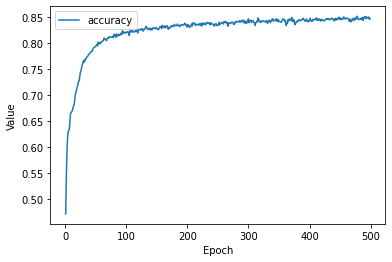

In [6]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 500
batch_size = 5000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test, y=y_test, batch_size=batch_size)

In [12]:
# make a prediction from the trained model
index=22
data = tf.constant(x_test.iloc[index].tolist(), shape=(1,27))
result = my_model.predict(data)
print(pd.DataFrame(result))
print(y_test.iloc[index])

     0    1    2
0 0.95 0.05 0.00
0


In [9]:
# calculate accuracy per complexity level (manual version of a confusion matrix)
testdata = x_test.copy()
testdata.insert(0, "complexity", y_test)
x_test_cm = testdata.loc[testdata["complexity"] == 0]
y_test_cm = x_test_cm.pop("complexity")
print("Complexity level 1:")
my_model.evaluate(x=x_test_cm, y=y_test_cm, batch_size=5000)
x_test_cm = testdata.loc[testdata["complexity"] == 1]
y_test_cm = x_test_cm.pop("complexity")
print("Complexity level 2:")
my_model.evaluate(x=x_test_cm, y=y_test_cm, batch_size=5000)
x_test_cm = testdata.loc[testdata["complexity"] == 2]
y_test_cm = x_test_cm.pop("complexity")
print("Complexity level 3:")
my_model.evaluate(x=x_test_cm, y=y_test_cm, batch_size=5000)

Complexity level 1:
1/1 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.8709
Complexity level 2:
1/1 [==============================] - 0s 1ms/step - loss: 0.5527 - accuracy: 0.6826
Complexity level 3:
1/1 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.9702


[0.05821241810917854, 0.9701770544052124]